<a href="https://colab.research.google.com/github/Gingercapo/Fuel_Economy/blob/main/fuel_Economic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline


In [16]:
# Read my data from a url 
df = pd.read_csv("/content/fuel-econ.csv")
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


# Scatter Plot
- A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

Text(0, 0.5, 'Combined Fuel efficieny (mpg)')

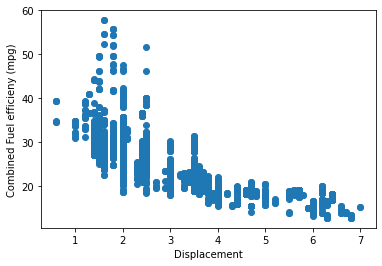

In [19]:
# Scatter plot for the data we want to plot
plt.scatter(data = df, x = "displ", y = "comb");
plt.xlabel("Displacement")
plt.ylabel("Combined Fuel efficieny (mpg)")

- In the example above, **the relationship between the two variables is negative** because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.